<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Statistical-Comparison-of-BigBEts-and-MWU" data-toc-modified-id="Statistical-Comparison-of-BigBEts-and-MWU-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Statistical Comparison of BigBEts and MWU</a></span></li><li><span><a href="#Pathway-level-BiG-BET-scores" data-toc-modified-id="Pathway-level-BiG-BET-scores-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Pathway level BiG-BET scores</a></span></li><li><span><a href="#GO-Term-Analysis-of-low-big-bet-genes" data-toc-modified-id="GO-Term-Analysis-of-low-big-bet-genes-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>GO Term Analysis of low big-bet genes</a></span><ul class="toc-item"><li><span><a href="#lowest-z-score-genes" data-toc-modified-id="lowest-z-score-genes-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>lowest z-score genes</a></span></li></ul></li><li><span><a href="#Supplemental-Figures" data-toc-modified-id="Supplemental-Figures-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Supplemental Figures</a></span><ul class="toc-item"><li><span><a href="#Histogram-of-TMB-values-by-DDR-pathways" data-toc-modified-id="Histogram-of-TMB-values-by-DDR-pathways-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Histogram of TMB values by DDR pathways</a></span></li><li><span><a href="#Histogram-of-DDR-Genes" data-toc-modified-id="Histogram-of-DDR-Genes-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Histogram of DDR Genes</a></span></li><li><span><a href="#Individual-Gene-CDFs" data-toc-modified-id="Individual-Gene-CDFs-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Individual Gene CDFs</a></span></li><li><span><a href="#TCGA-vs-Samstein-BiG-BET-scores" data-toc-modified-id="TCGA-vs-Samstein-BiG-BET-scores-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>TCGA vs Samstein BiG-BET scores</a></span></li><li><span><a href="#Percentage-Genes-High-BigBETS-by-pathway" data-toc-modified-id="Percentage-Genes-High-BigBETS-by-pathway-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Percentage Genes High BigBETS by pathway</a></span></li></ul></li></ul></div>

# Imports

In [118]:
import os,sys,re
import gzip,pickle

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as mc
import matplotlib as mpl
import matplotlib.image as mpimg
import matplotlib.patches as patches
from matplotlib.legend import Legend

mpl.rc('font', family='sans-serif') 
mpl.rc('font', serif='Arial') 
mpl.rc('text', usetex='false') 
mpl.rc('xtick',labelsize=18)
mpl.rc('ytick',labelsize=18)
from statannotations.Annotator import Annotator

import seaborn as sbn
import numpy as np
import scipy.stats as stats
import pandas as pd
import statsmodels.api as sm
sys.path.insert(0,'..')
import bigbets
graphics_dir="/Users/whweir/Dropbox/2020_Weir_TMB/CellRepMed Submission/R1_CellRepMed/updated_figures/"
samples_dir='/Users/whweir/Documents/UNC_SOM_docs/Mucha_Lab/Mucha_Python/TCGA/PMEC/notebooks/PMEC/sampling_bipartite_null_rewiring/'
sub_samples_dir=os.path.join(samples_dir,'sampled_data/')

supplements_dir=os.path.join(graphics_dir,"supplement_updated")
red=(200/255,58/255,52/255)
blue=(58/255,71/255,133/255)


In [2]:
tcga_data=bigbets.TCGA_Data()
ddr_obj=bigbets.ddr_data_object.myddr_obj
all_big_bets=pd.read_csv(bigbets.load_clinical_datasets.bigbet_scores_file,index_col=0)
all_big_bets['path'] = list(map(lambda x: ddr_obj.gene_2_path_dict.get(x, ['None'])[0], all_big_bets.index))
tcga_spec_by_genes=tcga_data.tcga_spec_by_all_genes
tcga_snv_indel_df=tcga_data.tcga_snv_indel_df


2021-12-03 10:16:54,450:bigbets.load_tcga_dataset:INFO:Loading TCGA dataset
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.
2021-12-03 10:17:56,183:bigbets.load_tcga_dataset:INFO:alteration_data_tcga.shape: (3600963, 25)
2021-12-03 10:18:13,190:bigbets.load_tcga_dataset:INFO:Filtering TCGA Dataset


tcga_alt_filt.shape (208682, 28)
querying 1-274...done.
Finished.
12 input query terms found no hit:
	['C1orf86', 'APITD1', 'TCEB3', 'BRE', 'SHFM1', 'TCEB1', 'H2AFX', 'NDNL2', 'TCEB2', 'C17orf70', 'STRA
querying 1-12...done.
Finished.
5 input query terms found dup hits:
	[('APITD1', 2), ('TCEB3', 2), ('BRE', 3), ('SHFM1', 10), ('STRA13', 2)]


In [3]:
np.log10(10/tcga_spec_by_genes.shape[0])

-2.979092900638326

In [4]:

all_big_bets['is_ddr']=all_big_bets['path'].apply(lambda x: 'DDR' if x!='None' else 'non DDR')
#uncorrected pvalues
# all_big_bets['mwu_sig']=all_big_bets['mwu_tcga']<.05
# print(np.sum(all_big_bets['mwu_sig']),all_big_bets.shape[0],np.mean(all_big_bets['mwu_sig']))
# all_big_bets['zscore_sig']=all_big_bets['zscore_tcga']>=1.96

# use corrected values
is_sig,pval_correct,_,_=sm.stats.multipletests(all_big_bets['mwu_tcga'],method='fdr_bh',alpha=.1)
all_big_bets['mwu_sig']=is_sig
all_big_bets['mwu_padj']=pval_correct
all_big_bets['-log10_padj']=-1*np.log10(all_big_bets['mwu_padj'])

is_sig,pval_correct,_,_=sm.stats.multipletests(all_big_bets['pval_tcga'],method='fdr_bh',alpha=.1)
all_big_bets['zscore_sig']=is_sig



# Statistical Comparison of BigBEts and MWU

/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:45: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


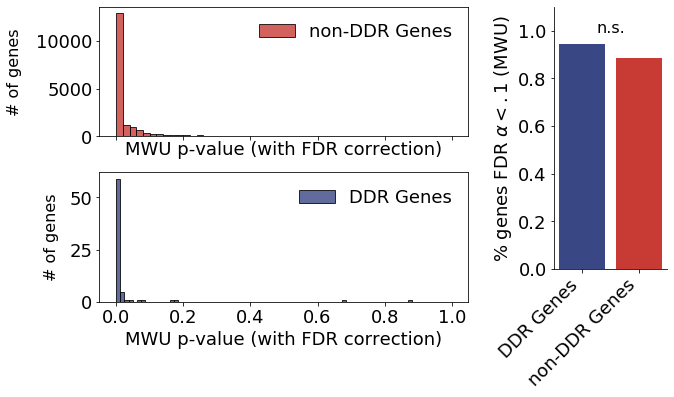

In [5]:
hist_outfile=os.path.join(graphics_dir,"MWU_pvals_comparison.pdf")

r=(200/255,58/255,52/255)
b=(58/255,71/255,133/255)

ddr_filt_only=all_big_bets.iloc[np.where(np.logical_not(all_big_bets['path'].isin(['None'])))[0],:]

f=plt.figure()
f.set_size_inches((9.5,6))

ncols=100
nrows=10
gs = gridspec.GridSpec(nrows, ncols, figure=f)

a=plt.subplot(gs[:int((nrows//2)*.95),:ncols-35])

# a.text(s='A)',fontsize=18,fontweight='bold',x=-.06,y=1.0,transform=a.transAxes)
a.hist(all_big_bets.loc[all_big_bets['path']=='None',:]['mwu_padj'],
       bins=50,alpha=.8,color=red,
       edgecolor='k',density=False,label='non-DDR Genes')
# a.vlines(x=.05,ymin=0,ymax=10000,linewidth=2,linestyle='--',label=r'$\alpha=.05$')
plt.setp(a.get_xticklabels(), visible=False)
a.set_ylabel("",fontsize=18,)
a.set_xlabel('MWU p-value (with FDR correction)',fontsize=18)
a.text(s="# of genes",y=.5,x=-.25,transform=a.transAxes,rotation=90,
       fontsize=16,verticalalignment='center')

# a.set_title("Dist. MWU-test p-values",fontsize=18,fontweight='bold')
a.legend(loc=1,fontsize=18,frameon=False)
a2 = plt.subplot(gs[nrows//2:int(nrows*.95),:ncols-35], sharex = a)
a2.hist(ddr_filt_only['mwu_padj'],bins=72,alpha=.8,color=blue,
        edgecolor='k',density=False,label='DDR Genes')
a2.set_xlabel("MWU p-value (with FDR correction)",fontsize=18)
a2.text(s="# of genes",y=.5,x=-.15,transform=a2.transAxes,rotation=90,
        fontsize=16,verticalalignment='center')

# a2.vlines(x=.05,ymin=0,ymax=50,linewidth=2,linestyle='--',label=r'$\alpha=.05$')

a2.legend(loc=1,fontsize=18,frameon=False)

top=int(.85*nrows)
a3=plt.subplot(gs[:top,-20:])

cont_tab=all_big_bets.groupby(['is_ddr','mwu_sig']).size().unstack()
per_tab=np.divide(cont_tab,np.sum(cont_tab,axis=1)[:,None])

a3.bar(x=[0,1],height=per_tab.loc[:,True],color=[blue,red],label='p<.05')
# a3.bar(x=[0,1],height=per_tab.loc[:,False],color='b',bottom=per_tab.loc[:,True],label='p>.05')


_,pval,_,_=stats.chi2_contingency(cont_tab)
# _,pval=stats.fisher_exact(cont_tab,alternative='two-sided')

# a3.text(s='p={:.3f}'.format(pval),fontsize=20,
#        y=.95,x=.25,horizontalalignment='center',transform=a3.transAxes)


# a3.annotate(s=r'$\chi^2$ $p={:.3f}$'.format(pval),xy=(.5,.9),transform=a.transAxes,
#            xytext=(.5,.94),
#            bbox=dict(boxstyle='square',fc='white'), 
#          fontsize=16, ha='center', va='bottom',
#            arrowprops=dict(arrowstyle='-[, widthB=1.5, lengthB=1', lw=2.0),
#            xycoords='axes fraction')
a3.text(s='n.s.',x=.5,y=.9,transform=a3.transAxes,
        horizontalalignment='center',fontsize=16)

# a3.yaxis.tick_right()

a3.set_xticks([0,1])
a3.set_xticklabels(['DDR Genes','non-DDR Genes'],fontsize=18,rotation=45,horizontalalignment='right')
a3.set_ylabel(r'% genes FDR $\alpha<.1$ (MWU)',fontsize=18)
a3.spines['right'].set_visible(False)
a3.spines['top'].set_visible(False)

# a3.legend(fontsize=20,loc=10,bbox_to_anchor=(1.07,.9))
# a3.set_title("% Significant: \nMWU",fontsize=20,fontweight='bold')
a3.set_ylim([0,1.1])

f.subplots_adjust(top=.91,right=.97,bottom=.15,left=.14,wspace=0,hspace=.1)
f.savefig(hist_outfile,dpi=200)
plt.show()

In [6]:

#collect mutation rates and TMB
def get_median_sample_tmb_genes(df,snv_indels_df):
    tmbs=snv_indels_df.loc[df.index,'tmb']
    gene_medians=df.apply(lambda x: np.mean(tmbs.iloc[np.where(x>0)[0]].dropna()),axis=0)
    return gene_medians



gene_median_tmb_tcga=get_median_sample_tmb_genes(tcga_spec_by_genes,tcga_snv_indel_df)
tcga_all_mutrates=np.sum(tcga_spec_by_genes,axis=0)/(tcga_spec_by_genes.shape[0])
sizes=np.sum(tcga_spec_by_genes,axis=0)

mutrate_tmb_tcga=pd.DataFrame([tcga_all_mutrates,gene_median_tmb_tcga,sizes],index=['mutrate','medtmb','size']).T
mutrate_tmb_tcga['ddr_path']=list(map(lambda x: ddr_obj.gene_2_path_dict.get(x,['None'])[0],mutrate_tmb_tcga.index.values))
paths=list(set([v[0] for v in ddr_obj.gene_2_path_dict.values()]))
cols=sbn.color_palette('Set1',n_colors=len(paths))
path2coldict=dict(zip(paths,cols))
mutrate_tmb_tcga['ddr_col']=mutrate_tmb_tcga['ddr_path'].apply(lambda x :path2coldict.get(x,(0,0,0,1)) )
mutrate_tmb_tcga_ddr=mutrate_tmb_tcga.iloc[np.where(mutrate_tmb_tcga['ddr_path']!='None')[0],:]
mutrate_tmb_tcga['log10medtmb']=np.log10(mutrate_tmb_tcga['medtmb'])
mutrate_tmb_tcga['isDDR']=mutrate_tmb_tcga['ddr_path'].apply(lambda x: 'nonDDR' if x=='None' else 'DDR')



xlower=np.power(10.0,-3.0)
mutrate_tmb_tcga_filt=mutrate_tmb_tcga.iloc[np.where(mutrate_tmb_tcga['mutrate']>xlower)[0],:]

# mutrate_tmb_tcga_ddr_only_filt=mutrate_tmb_tcga.iloc[np.where(mutrate_tmb_tcga.index.isin(ddr_gene_df.index))[0],:]



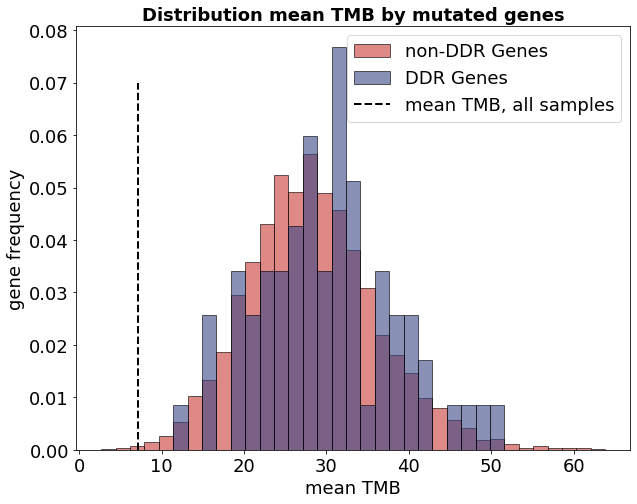

In [7]:
plt.close()


f,a=plt.subplots(1,1,figsize=(10,7))
outfile=os.path.join(graphics_dir,"median_tmb_distribution.pdf")
a=plt.subplot(1,1,1)

# Leg1=Legend(a, leg1, paths, bbox_to_anchor=(1.05, 1),loc=0)
a.set_title("Distribution mean TMB by mutated genes",fontsize=18,fontweight='bold')
# a.add_artist(Leg1)
a.set_xlabel("mean TMB",fontsize=18)
a.set_ylabel("gene frequency",fontsize=18)


mhist=a.hist(mutrate_tmb_tcga_filt['medtmb'],color=red,label='non-DDR Genes',
             edgecolor='k',alpha=.6,bins=35,density=True)
a.hist(mutrate_tmb_tcga_ddr['medtmb'],color=blue,label='DDR Genes',
             edgecolor='k',alpha=.6,density=True,bins=mhist[1])
a.vlines(x=np.mean(tcga_snv_indel_df['tmb'].dropna()),
         ymin=0,ymax=.07,linestyle='--',linewidth=2,label='mean TMB, all samples')

a.legend(fontsize=18)
# f.subplots_adjust(top=.94,bottom=.05,right=.99,left=.04)
f.subplots_adjust(top=.945,right=.88,bottom=.105,left=.11)
# a.set_xlim([-1,60])
f.savefig(outfile)
plt.show()

DDR vs. nonDDR: Mann-Whitney-Wilcoxon test two-sided, P_val:4.139e-02 U_stat=1.802e+05


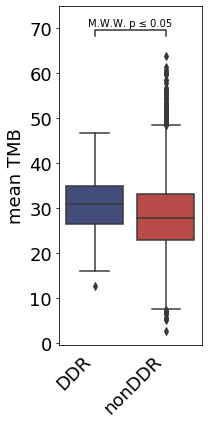

In [8]:
outfile=os.path.join(graphics_dir,"med_tmb_boxplot_DDRcomparison_tcga.pdf")
plt.close()
f,a=plt.subplots(1,1,figsize=(3,6))
leg1=[]
order=['DDR','nonDDR']
a=plt.subplot(1,1,1)
plotkw={'y':'medtmb','x':'isDDR','data':mutrate_tmb_tcga_filt,
        'order':order}
sbn.boxplot(data=mutrate_tmb_tcga_filt,y='medtmb',x='isDDR',ax=a,palette=[blue,red],order=order)
annotator = Annotator(a,pairs=[('nonDDR','DDR')], **plotkw)
annotator.configure(test="Mann-Whitney",text_format='simple')
annotator.apply_and_annotate()

# a.set_ylim([0,150])

a.set_xlabel('')
a.set_ylabel('mean TMB',fontsize=18)

plt.setp(a.get_xticklabels(), fontsize=18)
a.xaxis.set_tick_params(width=0)

for t in a.get_xticklabels():
    t.set_rotation(45)
    t.set_horizontalalignment('right')

f.tight_layout()
f.savefig(outfile)
plt.show()

/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:26: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


mwu_sig     False     True 
is_ddr                     
DDR      0.055556  0.944444
non DDR  0.113669  0.886331
zscore_sig     False     True 
is_ddr                        
DDR         0.972222  0.027778
non DDR     0.994658  0.005342


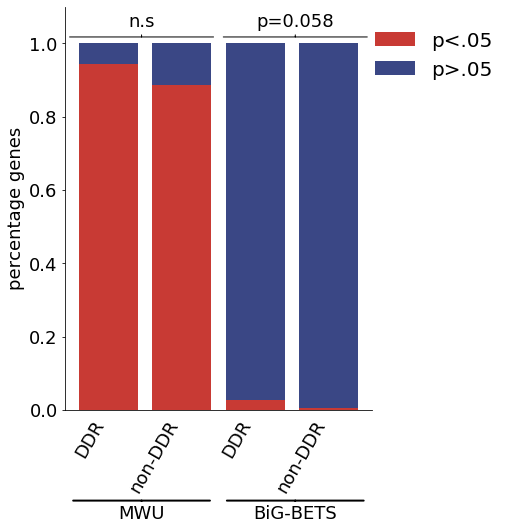

In [9]:
mwu_sig_comparison=os.path.join(graphics_dir,'mwu_sig_barplot.pdf')

cont_tab=all_big_bets.groupby(['is_ddr','mwu_sig']).size().unstack()

per_tab=np.divide(cont_tab,np.sum(cont_tab,axis=1)[:,None])

# per_tab

plt.close()
f,a=plt.subplots(1,1,figsize=(7,7))
a.bar(x=[0,1],height=per_tab.loc[:,True],color=red,label='p<.05')
a.bar(x=[0,1],height=per_tab.loc[:,False],color=blue,bottom=per_tab.loc[:,True],label='p>.05')
print(per_tab)


_,pval,_,_=stats.chi2_contingency(cont_tab)
# _,pval=stats.fisher_exact(cont_tab,alternative='two-sided')

# a.text(s='p={:.3f}'.format(pval),fontsize=20,
#        y=.95,x=.25,horizontalalignment='center',transform=a.transAxes)
a.annotate(s='n.s',fontsize=18,xy=(.25,.92),xytext=(.25,.95),
           arrowprops=dict(arrowstyle='-[, widthB=4.0, lengthB=0', lw=1.0),
           xycoords='axes fraction',horizontalalignment='center',transform=a.transAxes)

cont_tab=all_big_bets.groupby(['is_ddr','zscore_sig']).size().unstack()
per_tab=np.divide(cont_tab,np.sum(cont_tab,axis=1)[:,None])
print(per_tab)
# per_tab

a.bar(x=[2,3],height=per_tab.loc[:,True],color=red)
a.bar(x=[2,3],height=per_tab.loc[:,False],color=blue,bottom=per_tab.loc[:,True])

a.annotate(s='MWU',xy=(.25,-.22),
           xytext=(.25,-.28),
#            bbox=dict(boxstyle='square',fc='white'), 
         fontsize=18, ha='center', va='bottom',
           arrowprops=dict(arrowstyle='-[, widthB=3.80, lengthB=0', lw=2.0),
           xycoords='axes fraction')

a.annotate(s='BiG-BETS',xy=(.75,-.22),
           xytext=(.75,-.28),
#            bbox=dict(boxstyle='square',fc='white'), 
         fontsize=18, ha='center', va='bottom',
           arrowprops=dict(arrowstyle='-[, widthB=3.80, lengthB=0', lw=2.0),
           xycoords='axes fraction')

a.set_xticks([0,1,2,3])
# a.set_xticklabels(['DDR','all genes','DDR','all genes'],fontsize=14)
a.set_xticklabels(['DDR','non-DDR','DDR','non-DDR'],fontsize=14)
for tick in a.get_xticklabels():
    tick.set_rotation(60)
    tick.set_horizontalalignment('right')
    tick.set_fontsize(18)
a.xaxis.set_tick_params(width=0)
a.spines['right'].set_visible(False)
a.spines['top'].set_visible(False)

a.legend(fontsize=20,loc=10,bbox_to_anchor=(1.2,.88),frameon=False)
# a.set_title("Percent Significance: MWU vs Network-Test",fontsize=20,fontweight='bold')
a.set_ylim([0,1.1])
# _,pval,_,_=stats.chi2_contingency(cont_tab)
_,pval=stats.fisher_exact(cont_tab,alternative='two-sided')

a.set_ylabel("percentage genes",fontsize=18)

a.annotate(s='p={:.3f}'.format(pval),fontsize=18,xy=(.75,.92),xytext=(.75,.95),
           arrowprops=dict(arrowstyle='-[, widthB=4.0, lengthB=0', lw=1.0),
           xycoords='axes fraction',horizontalalignment='center',transform=a.transAxes)

# a.text(s='p={:.3f}'.format(pval),fontsize=20,
#        y=.95,x=.75,horizontalalignment='center',transform=a.transAxes)

f.subplots_adjust(top=.97,right=.73,left=.12,bottom=.17)
f.savefig(mwu_sig_comparison,dpi=200)
plt.show()
# cont_tab

# Pathway level BiG-BET scores

In [101]:
# combined pathway level individual runs
combined_path_data={}

# load individual runs
smaller_runs_dir=os.path.join(sub_samples_dir,"smaller_runs")
data_files_path=[ os.path.join(smaller_runs_dir,f) for f in os.listdir(smaller_runs_dir) if re.search("path.pickle",f)]

#we keep track of the mean tmb for each gene and each sample across all runs
combined_cdfs_tmbs={}
combined_mean_tmbs={}
# ind2keep=drop_leading_inds(200,8,20)
for i,file in enumerate(data_files_path):
    print(i)
    with gzip.open(file,'rb') as fh:
        cdata=pickle.load(fh)
    for path in cdata.keys():
        print(path,end=', ')
        all_x,all_ecdf=cdata.loc[path]
        cmean_tmbs=[np.mean(x) for x in all_x] 
        combined_mean_tmbs[path]=combined_mean_tmbs.get(path,[])+cmean_tmbs
        if i==0:
            combined_cdfs_tmbs[path]=(np.array(all_x),np.array(all_ecdf))
        else:
            cur_comb_all_x,cur_comb_ecdf=combined_cdfs_tmbs[path]
            combined_cdfs_tmbs[path]=(np.concatenate([cur_comb_all_x,all_x],axis=0),
                                      np.concatenate([cur_comb_ecdf,np.array(all_ecdf)]))
    del cdata
    print()
    
all_ind=tcga_data.tcga_spec_by_all_genes_wmod.index
array2use=tcga_data.tcga_spec_by_all_genes
snv_df=tcga_data.tcga_snv_indel_df


ddr_path_bigbets=pd.DataFrame()
for path in combined_mean_tmbs.keys():
    mean_tmbs=combined_mean_tmbs[path]
    genes=ddr_obj.path_2_genes_dict[path]
    ctmbs=bigbets.bipartite_helper_functions.get_tmb_values_genes(genes,array2use,snv_indel_df=snv_df)
    ctmbs=ctmbs.to_frame(name='tmb')
    ctmbs['sample']=ctmbs.index
    ctmbs['path']=path
    ctmbs.index=np.arange(ctmbs.shape[0])
#     path_tmb_vals=pd.concat([path_tmb_vals,ctmbs])
    ddr_path_bigbets.loc[path,['MWU_stat','MWU_pval']]=bigbets.bipartite_helper_functions.cal_mwu_pval(genes,array2use,
                                                              outgroup=all_ind,
                                                              snv_indel_df=snv_df)
    obs_mean_tmb=np.mean(np.log1p(ctmbs['tmb']))
    zscore=stats.mstats.zscore(np.append(mean_tmbs,obs_mean_tmb))[-1]
    ddr_path_bigbets.loc[path,'BiG-BETS']=zscore
    ddr_path_bigbets.loc[path,'path']=path

ddr_path_bigbets['-1og10_MWU']=-1*np.log10(ddr_path_bigbets['MWU_pval'])
ddr_path_bigbets['pval_tcga']=stats.norm.sf(abs(ddr_path_bigbets['BiG-BETS'])) #one-sided
_,ddr_path_bigbets['padj_tcga'],_,_ = sm.stats.multipletests(alpha=.05,pvals=ddr_path_bigbets['pval_tcga'],method='fdr_bh')


0
BER, NER, MMR, FA, HR, NHEJ, DS, histone_modification_pathway, chromatin_remodel, 
1
BER, NER, MMR, FA, HR, NHEJ, DS, histone_modification_pathway, chromatin_remodel, 
2
BER, NER, MMR, FA, HR, NHEJ, DS, histone_modification_pathway, chromatin_remodel, 
3
BER, NER, MMR, FA, HR, NHEJ, DS, histone_modification_pathway, chromatin_remodel, 
4
BER, NER, MMR, FA, HR, NHEJ, DS, histone_modification_pathway, chromatin_remodel, 
5
BER, NER, MMR, FA, HR, NHEJ, DS, histone_modification_pathway, chromatin_remodel, 


In [42]:
ddr_path_bigbets

,MWU_stat,MWU_pval,BiG-BETS,path,-1og10_MWU,pval_tcga,padj_tcga
BER,488054.5,1.225417e-20,1.138350,BER,19.911716,1.274872e-01,1.639121e-01
NER,976035.0,4.119768e-39,2.047648,NER,38.385127,2.029723e-02,3.653501e-02
MMR,1822451.5,3.211377e-77,3.317426,MMR,76.493309,4.542552e-04,1.362765e-03
FA,1194292.0,1.583768e-42,0.035796,FA,41.800308,4.857226e-01,4.857226e-01
HR,3354044.5,7.043636e-97,-1.525955,HR,96.152203,6.351050e-02,9.526576e-02
NHEJ,1467639.0,1.118982e-49,-0.259136,NHEJ,48.951177,3.977652e-01,4.474858e-01
DS,2463485.5,2.310404e-69,-2.171985,DS,68.636312,1.492838e-02,3.358886e-02
histone_modification_pathway,16679910.5,1.381709e-182,-12.008288,histone_modification_pathway,181.859584,1.607149e-33,7.232171e-33
chromatin_remodel,19330201.0,9.731039e-152,-17.226183,chromatin_remodel,151.011841,8.446873e-67,7.602186e-66


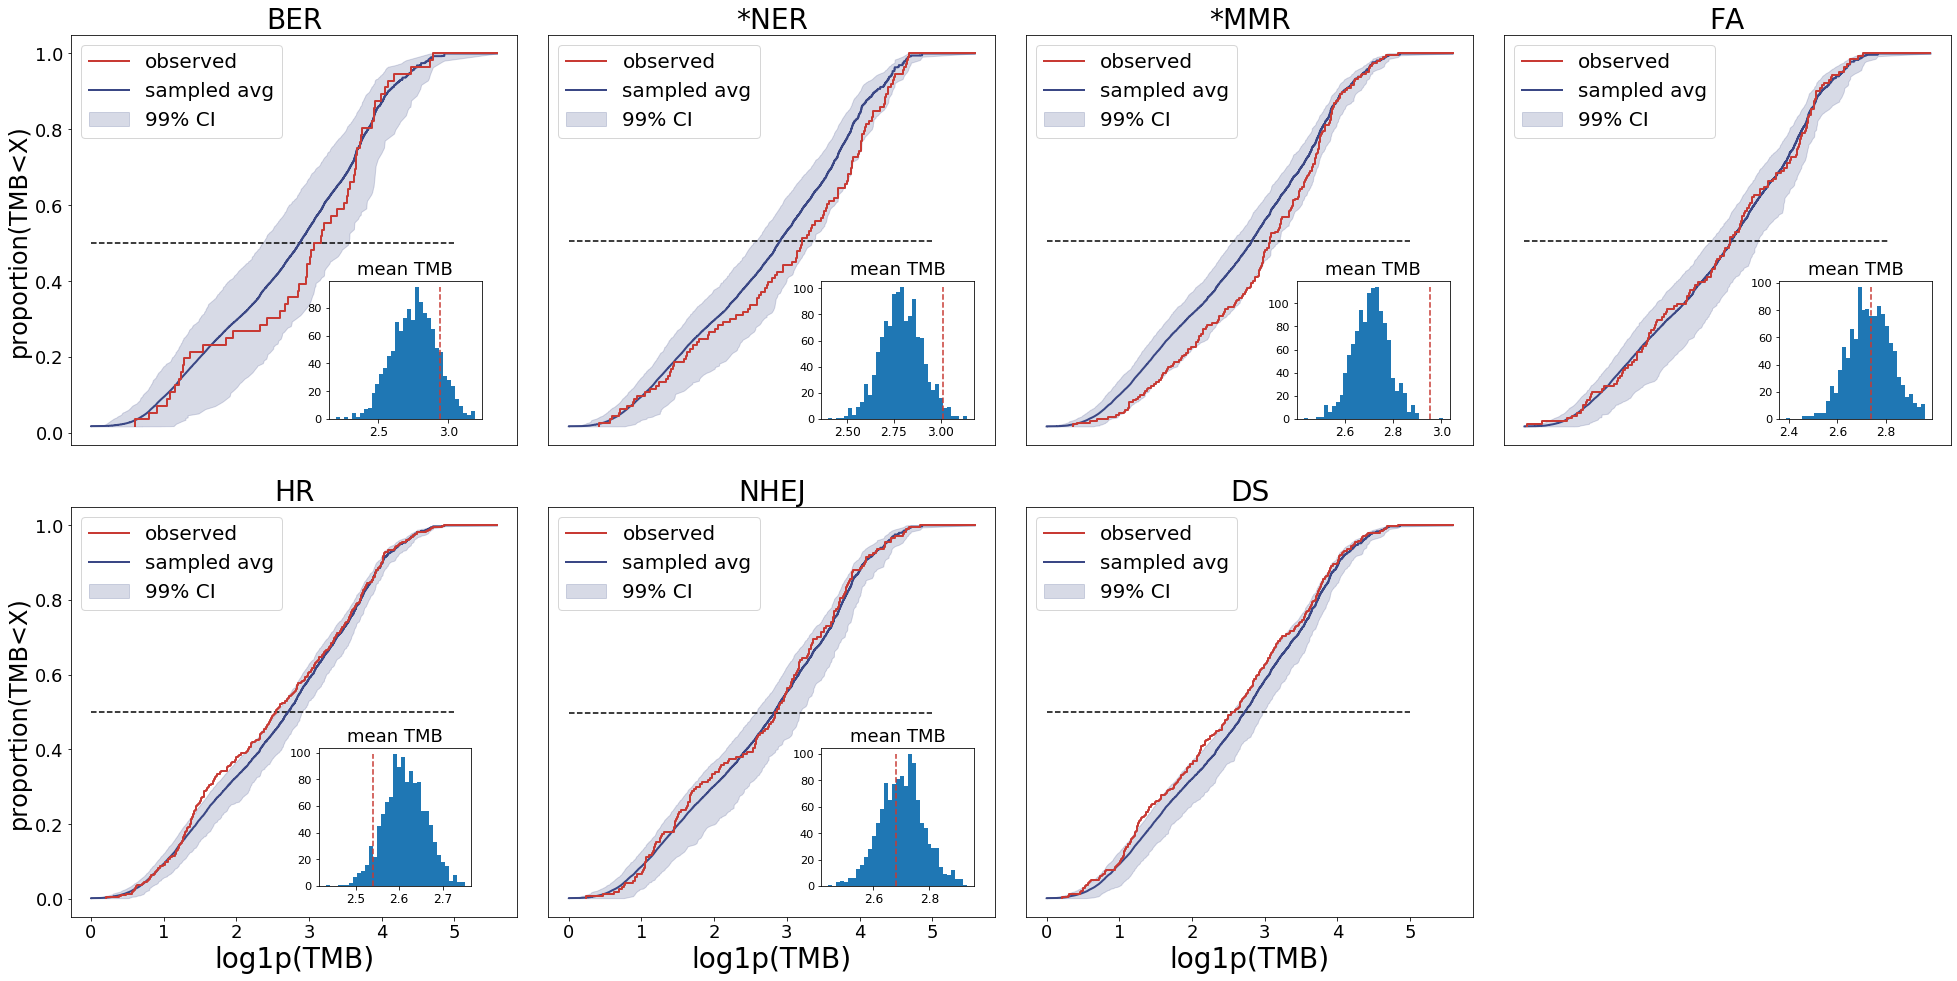

In [43]:
# outfile=os.path.join(graphics_dir,"tcga_path_rewiring_distribution_allgenes.png")
outfile=os.path.join(graphics_dir,'tcga_path_rewiring_distributions_allgenes.pdf')

array=tcga_data.tcga_spec_by_all_genes
data2use=combined_cdfs_tmbs
pathways2use=['BER', 'NER', 'MMR', 'FA', 'HR', 'NHEJ', 'DS']

f,a=plt.subplots(2,4,figsize=(28,14))

#adjusting position of the embedded figures ( these get changed with subplots_adjust)
rects=[[.3,.05,.45,.4],[.55,.05,.45,.4],[.75,.05,.45,.4],[.97,.05,.45,.4],
      [.27,-.1,.45,.4],[.55,-.1,.45,.4],[.8,-.15,.45,.4]]

for ii,ind in enumerate(pathways2use):
    a=plt.subplot(2,4,ii+1)
    all_x,all_ecdf=data2use[ind]
    x_cat, mean_ecdf, ecdf_lower, ecdf_upper = bigbets.bipartite_helper_functions.get_ecdf_upper_lower(all_x, all_ecdf)
#     gene=array.columns[ind]
    genes=ddr_obj.path_2_genes_dict[ind]
    x1,ecdf1=bigbets.bipartite_helper_functions.get_ecdf_tmb_df(genes=genes,df=array,
                                              snv_indel_df=tcga_snv_indel_df)

    a.step(x1, ecdf1, color=red, label='observed', zorder=3, linewidth=2)
    a.hlines(y=.5, xmin=0, xmax=5, linestyle='--')
    #     a.plot(x,ecdf,color='g',label='all')
    a.step(x_cat, mean_ecdf, color=blue, label='sampled avg', linewidth=2)
    # a.set_title("{:}({:d} genes / {:d} samples)".format(path, len(path_ind), nsamps), fontsize=20,
    #             fontweight='bold')
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    a2=bigbets.bipartite_helper_functions.add_subplot_axes(ax=a,rect=rects[ii])
    a2.set_title("mean TMB",fontsize=18)
    med_tmbs=[]
    for i, x_s in enumerate(all_x):
#         a.step(x_s, all_ecdf[i], color='b', alpha=.05)
        med_tmbs.append(np.mean(x_s))

    zscore=stats.mstats.zscore(a=np.append(med_tmbs,np.mean(x1)))[-1]
    a.fill_between(x_cat, ecdf_lower,ecdf_upper,color=blue,alpha=.2,label='99% CI')

    y, x, _ =a2.hist(med_tmbs,bins=35)
    a2.vlines(x=np.mean(x1),ymin=0,ymax=y.max(),color=red,linestyle='--')
    if zscore > 1.96:
        a.set_title("*{}".format(ind), fontsize=28)
    else:
        a.set_title("{}".format(ind), fontsize=28)
    if ii in [4,5,6]:
        a.set_xlabel("log1p(TMB)", fontsize=28)
    else:
        a.set_xlabel("")
        a.set_xticks([])
    
    if ii not in [0,4]:
        a.set_yticks([])
    else:
        a.set_ylabel('proportion(TMB<X)',fontsize=24)


    #     a.set_xlim([0,.1])
    a.legend(fontsize=20)
    # true_vals = get_ecdf_tmb(indarray,snv_indels_df=snv_indels_df)


#     xlabs=[ x.get_text() for x in list(a.get_xticklabels())]
#     ylabs=[ x.get_text() for x in list(a.get_yticklabels())]
#     a.set_xticklabels(xlabs,fontsize=18)
#     a.set_yticklabels(ylabs,fontsize=18)

    # a.hist(data2use.iloc[ind,:].values,bins=35)
    # a.vlines(x=true_val[ind],ymin=0,ymax=4,linestyle='--')
# f.suptitle('DDR Pathways',fontsize=24,fontweight='bold',x=.5,y=.985,
#            transform=f.transFigure)
# f.tight_layout()

plt.subplot(2,4,8).set_visible(False)

f.subplots_adjust(top=.935,bottom=.06,right=.98,left=.0475,wspace=.07,hspace=.15)
f.savefig(outfile,dpi=200)
plt.show()

# GO Term Analysis of low big-bet genes

In [80]:

cut=.05
high_zscore_genes=all_big_bets.iloc[np.where(np.logical_and(all_big_bets['zscore_tcga']>0,
         all_big_bets['padj_tcga']<cut))[0],:].index.values
print(len(high_zscore_genes))

high_zscore_genes=all_big_bets.sort_values(ascending=False,by='zscore_tcga').iloc[:50,:].index.values
low_zscore_genes=all_big_bets.sort_values(by='zscore_tcga',ascending=True).index[:50]

# high_zscore_genes=all_big_bets.iloc[np.where(all_big_bets['padj_tcga']<cut)[0],:].index.values
print(len(high_zscore_genes))


8
50


In [84]:
os.path.isfile("go-basic.obo")

True

In [86]:
#from goatools github site https://github.com/tanghaibao/goatools/blob/master/notebooks/goea_nbt3102.ipynb
from goatools.base import download_go_basic_obo
from goatools.base import download_ncbi_associations
from goatools.obo_parser import GODag
from goatools.associations import read_ncbi_gene2go
from goatools.test_data.genes_NCBI_9606_ProteinCoding import GENEID2NT as GeneID2nt_human
from goatools.go_enrichment import GOEnrichmentStudy
import mygene


data_dir=os.path.join(bigbets.file_locations.tcga_dir,'tcga_all_genes_GOterm_results')
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

my=mygene.MyGeneInfo()
goterm_results_dir=os.path.join(data_dir,"./GOTERM_resutls")
if not os.path.exists(goterm_results_dir):
    os.makedirs(goterm_results_dir)
    

obo_fname = download_go_basic_obo()

gene2go = download_ncbi_associations()


obodag = GODag("go-basic.obo")

geneid2gos_human = read_ncbi_gene2go("gene2go", taxids=[9606],namespace='BP')

convdict={'FAM46C':'TENT5C','WISP3':'CCN6'}
revdict = dict ([ (val,k) for k,val in convdict.items()])

geneids=list(map(lambda x: convdict.get(x,x),all_big_bets.index.values))
mg = mygene.MyGeneInfo()

read=True
genetable_out=os.path.join(data_dir,'gene_id_table.csv')
if read and os.path.exists(genetable_out):
    genetble=pd.read_csv(genetable_out,index_col=0)
else:
    genetble = mg.querymany(list(geneids),
                            fields=['entrezgene'],
                            scopes=['symbol'],
                            species='human',
                            as_dataframe=True)
    
    #drop missing
    genetble = genetble.iloc[np.where(genetble['notfound']!=True)[0],:]
    genetble=genetble.iloc[np.where(np.logical_not(pd.isnull(genetble['entrezgene'])))[0],:]
    genetble.to_csv(genetable_out)

#create a few useufl dictionaries here 
symbol2entrez=dict([ (revdict.get(k,k), int(val) ) for k,val in dict(zip(genetble.index,genetble['entrezgene'])).items()])
enterz2symol =  dict([( val,k) for k,val in symbol2entrez.items()])

# #filter for genes in current list
geneid2gos_human = dict( [(k,val) for k,val in  geneid2gos_human.items() if k in enterz2symol ]  ) #filter for genes in study

print("{N:,} annotated human genes".format(N=len(geneid2gos_human)))

goeaobj = GOEnrichmentStudy(
        geneid2gos_human.keys(), # List of human protein-coding genes
        geneid2gos_human, # geneid/GO associations
        obodag, # Ontologies
        propagate_counts = False,
        alpha = 0.1, # default significance cut-off
        methods = ['fdr_bh']) # defult multipletest correction method



  EXISTS: go-basic.obo
  EXISTS: gene2go
go-basic.obo: fmt(1.2) rel(2021-11-16) 47,155 GO Terms
HMS:0:00:04.821417 335,439 annotations READ: gene2go 
1 taxids stored: 9606
18569 IDs in association branch, BP
querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-16000...done.
querying 16001-17000...done.
querying 17001-18000...done.
querying 18001-18230...done.
Finished.


/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/biothings_client/base.py:129: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(obj)


299 input query terms found dup hits:
	[('AGAP7P', 2), ('AKR7L', 2), ('ANKRD20A2P', 2), ('ARHGAP19-SLIT1', 2), ('ARIH2OS', 2), ('B3GALT5-AS
143 input query terms found no hit:
	['AC002310.13', 'AC003002.6', 'AC004076.7', 'AC004381.6', 'AC005609.1', 'AC006435.1', 'AC006486.9', 
Pass "returnall=True" to return complete lists of duplicate or missing query terms.
15,982 annotated human genes

Load GOEA Gene Ontology Analysis ...
fisher module not installed.  Falling back on scipy.stats.fisher_exact
100% 15,982 of 15,982 population items found in association


In [87]:

sig_entrez=[ symbol2entrez[x] for x in high_zscore_genes if x in symbol2entrez.keys()]
goea_results_all = goeaobj.run_study(sig_entrez)
# goea_results_sig = [r for r in goea_results_all if r.p_fdr_bh < 0.1]
goea_results_sig = [r for r in goea_results_all if r.study_count > 0]

gofile=os.path.join(data_dir,"permutation_test_sig_goterms.txt")
goeaobj.wr_tsv(gofile, goea_results_sig)
gores=pd.read_table(gofile)

gores['item_symbols']=gores['study_items'].apply(lambda x: ",".join([ enterz2symol[int(entr)] 
                                                                     for entr in str(x).split(",")]))
ids2keep=gores.groupby('item_symbols')['depth'].idxmax()
gores=gores.loc[ids2keep,:]
gores.sort_values(by='p_uncorrected',inplace=True)


Run GOEA Gene Ontology Analysis: current study set of 50 IDs ...
100%     44 of     44 study items found in association
 88%     44 of     50 study items found in population(15982)
Calculating 12,236 uncorrected p-values using fisher_scipy_stats
  12,236 GO terms are associated with 15,982 of 15,982 population items
     371 GO terms are associated with     44 of     50 study items
  METHOD fdr_bh:
       0 GO terms found significant (< 0.1=alpha) (  0 enriched +   0 purified): statsmodels fdr_bh
       0 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
    371 items WROTE: /Users/whweir/Documents/UNC_SOM_docs/Mucha_Lab/Mucha_Python/TCGA/PMEC/pan_can_maf/tcga_all_genes_GOterm_results/permutation_test_sig_goterms.txt


## lowest z-score genes

In [88]:

sig_entrez=[ symbol2entrez[x] for x in low_zscore_genes if x in symbol2entrez.keys()]
goea_results_all = goeaobj.run_study(sig_entrez)
goea_results_sig = [r for r in goea_results_all if r.p_fdr_bh < 0.05]
# goea_results_sig = [r for r in goea_results_all if r.study_count > 0]

gofile=os.path.join(data_dir,"permutation_test_sig_goterms_lowscore.txt")
goeaobj.wr_tsv(gofile, goea_results_sig)
gores=pd.read_table(gofile)
gores['item_symbols']=gores['study_items'].apply(lambda x: ",".join([ enterz2symol[int(entr)] 
                                                                     for entr in str(x).split(",")]))
ids2keep=gores.groupby('item_symbols')['depth'].idxmax()
gores=gores.loc[ids2keep,:]
gores.sort_values(by='p_uncorrected',inplace=True)


Run GOEA Gene Ontology Analysis: current study set of 50 IDs ...
100%     50 of     50 study items found in association
100%     50 of     50 study items found in population(15982)
Calculating 12,236 uncorrected p-values using fisher_scipy_stats
  12,236 GO terms are associated with 15,982 of 15,982 population items
   1,096 GO terms are associated with     50 of     50 study items
  METHOD fdr_bh:
      93 GO terms found significant (< 0.1=alpha) ( 93 enriched +   0 purified): statsmodels fdr_bh
      47 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
     56 items WROTE: /Users/whweir/Documents/UNC_SOM_docs/Mucha_Lab/Mucha_Python/TCGA/PMEC/pan_can_maf/tcga_all_genes_GOterm_results/permutation_test_sig_goterms_lowscore.txt


In [92]:
# gores

In [93]:
#plot out goterm tree for several significant goterms
Go_id_subsets=[
    ['GO:0006355','GO:0045892','GO:0000122','GO:0045944','GO:0045893'],
    ['GO:0006338'],
    ['GO:0007050'],
    ['GO:0008285'],['GO:0043066'],['GO:2000134']
]
# Go_id_subsets=Go_id_subsets[0]
Go_id_subsets_flat=[ x for xs in Go_id_subsets for x in xs]

obodag_subset={}
for k,val in obodag.items():
    if k in Go_id_subsets_flat:
        obodag_subset[k]=val

for k,val in obodag_subset.items():
    for p in val.parents:
        if p.id not in Go_id_subsets_flat:
            p.parents={}
            
from goatools.godag_plot import plot_gos, plot_results, plot_goid2goobj

gotermplots=os.path.join(graphics_dir,'goterm_plots')
if not os.path.exists(gotermplots):
    os.makedirs(gotermplots)
    
for i,idset in enumerate(Go_id_subsets):
    outfile=os.path.join(gotermplots,'low_zscore_{:d}.png'.format(i))
    plot_gos(outfile, idset,
                obodag_subset,
                id2symbol=enterz2symol, # Print study gene Symbols, not Entrez GeneIDs
                study_items=6, # Only only 6 gene Symbols max on GO terms
                items_p_line=3, # Print 3 genes per line
                goea_results=goea_results_sig)

    

    5 usr  12 GOs  WROTE: /Users/whweir/Dropbox/2020_Weir_TMB/CellRepMed Submission/R1_CellRepMed/updated_figures/goterm_plots/low_zscore_0.png
    1 usr   2 GOs  WROTE: /Users/whweir/Dropbox/2020_Weir_TMB/CellRepMed Submission/R1_CellRepMed/updated_figures/goterm_plots/low_zscore_1.png
    1 usr   3 GOs  WROTE: /Users/whweir/Dropbox/2020_Weir_TMB/CellRepMed Submission/R1_CellRepMed/updated_figures/goterm_plots/low_zscore_2.png
    1 usr   3 GOs  WROTE: /Users/whweir/Dropbox/2020_Weir_TMB/CellRepMed Submission/R1_CellRepMed/updated_figures/goterm_plots/low_zscore_3.png
    1 usr   3 GOs  WROTE: /Users/whweir/Dropbox/2020_Weir_TMB/CellRepMed Submission/R1_CellRepMed/updated_figures/goterm_plots/low_zscore_4.png
    1 usr   4 GOs  WROTE: /Users/whweir/Dropbox/2020_Weir_TMB/CellRepMed Submission/R1_CellRepMed/updated_figures/goterm_plots/low_zscore_5.png


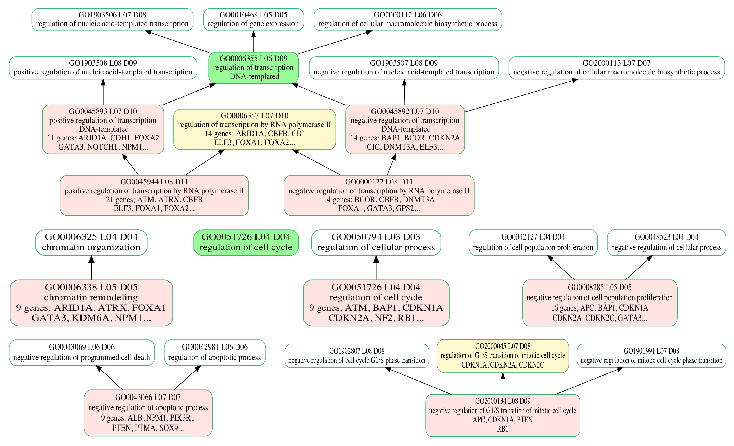

In [97]:
gotermout=os.path.join(graphics_dir,'goterms_combined_lowzscore.png')
plt.close()
f=plt.gcf()
f.set_size_inches(10,6)

#ROW 1
a=plt.subplot2grid((8,8),(0,0),rowspan=4,colspan=8)
a.set_axis_off()
outfile=os.path.join(gotermplots,'low_zscore_{:d}.png'.format(0))
img=mpimg.imread(outfile)
plt.imshow(img,aspect='auto',interpolation='none')

#ROW 2
a=plt.subplot2grid((8,8),(4,0),rowspan=2,colspan=2)
a.set_axis_off()
outfile=os.path.join(gotermplots,'low_zscore_{:d}.png'.format(1))
img=mpimg.imread(outfile)
plt.imshow(img,aspect='auto',interpolation='none')

a=plt.subplot2grid((8,8),(4,2),rowspan=2,colspan=3)
a.set_axis_off()
outfile=os.path.join(gotermplots,'low_zscore_{:d}.png'.format(2))
img=mpimg.imread(outfile)
plt.imshow(img,aspect='auto',interpolation='none')

a=plt.subplot2grid((8,8),(4,5),rowspan=2,colspan=3)
a.set_axis_off()
outfile=os.path.join(gotermplots,'low_zscore_{:d}.png'.format(3))
img=mpimg.imread(outfile)
plt.imshow(img,aspect='auto',interpolation='none')

#ROW 3
a=plt.subplot2grid((8,8),(6,0),rowspan=2,colspan=3)
a.set_axis_off()
outfile=os.path.join(gotermplots,'low_zscore_{:d}.png'.format(4))
img=mpimg.imread(outfile)
plt.imshow(img,aspect='auto',interpolation='none')

a=plt.subplot2grid((8,8),(6,3),rowspan=2,colspan=5)
a.set_axis_off()
outfile=os.path.join(gotermplots,'low_zscore_{:d}.png'.format(5))
img=mpimg.imread(outfile)
plt.imshow(img,aspect='auto',interpolation='none')

f.subplots_adjust(top=1.0,bottom=0,right=1.0,left=0.0)
f.savefig(gotermout,dpi=200)
plt.show()

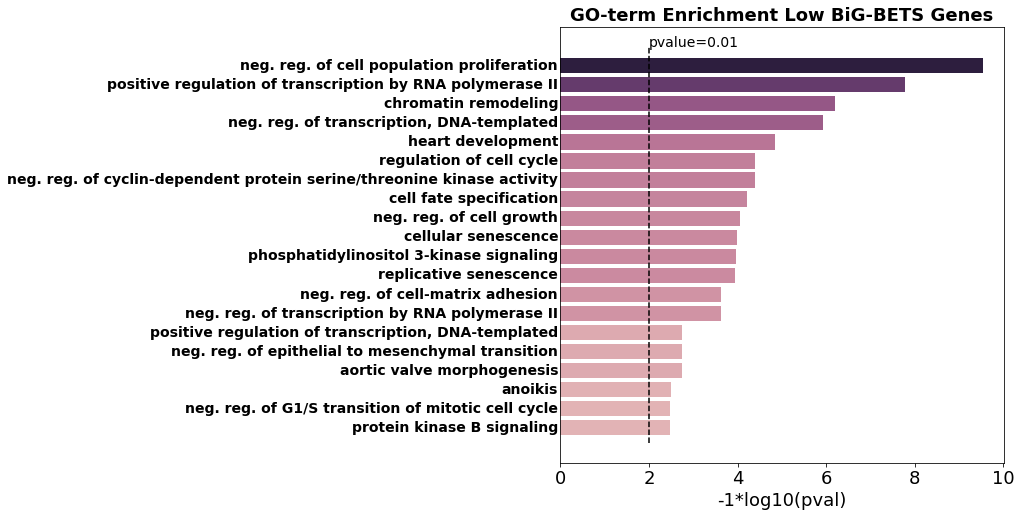

In [100]:
n2plot=20
outfile=os.path.join(graphics_dir,"go_terms_low_zscore_genes.pdf")
widths=-1*np.log10(gores['p_fdr_bh'])[:n2plot]
names=gores['name'][:n2plot]
glist=gores['item_symbols'][:n2plot]

cmap=sbn.cubehelix_palette(as_cmap=True)
cnorm=mc.Normalize(vmin=-1*np.log10(gores['p_fdr_bh'].max()),
                  vmax=-1*np.log10(gores['p_fdr_bh'].min()))

colors=list(map(lambda x: cmap(cnorm(-1*np.log10(x))),gores['p_fdr_bh'])) 


f,a=plt.subplots(1,1,figsize=(14,7))

a.barh(y=np.flip(range(n2plot)),color=colors,
       width=widths,height=.8)

# a.vlines(x=-1*np.log10(.05),ymin=-.8,ymax=n2plot,linestyle='--')
pval=.01
a.vlines(x=-1*np.log10(pval),ymin=-.8,ymax=n2plot,linestyle='--')
a.text(s='pvalue={:.2f}'.format(pval),x=-1*np.log10(pval),y=n2plot,fontsize=14)
# a.vlines(x=-1*np.log10(.001),ymin=-.8,ymax=n2plot,linestyle='--')

new_names=list(map(lambda x: re.sub("negative regulation","neg. reg.",x),names))
for i,lab in enumerate(new_names):
    a.text(s=lab,x=-0.05,y=len(names)-1.2-i,fontsize=14,horizontalalignment='right',fontweight='bold')
    
a.set_title("GO-term Enrichment Low BiG-BETS Genes",fontsize=18,fontweight='bold')
a.get_yaxis().set_visible(False)
a.set_xlabel("-1*log10(pval)",fontsize=18)

# for i,name in enumerate(names):
#     a.text(s=name,x=0,horizontalalignment='right',y=1.0-i/n2plot,transform=a.transAxes)

f.subplots_adjust(top=.955,right=.99,bottom=.09,left=.55)
f.savefig(outfile,dpi=200)

plt.show()

# Supplemental Figures

In [7]:
for path,genes in ddr_obj.path_2_genes_dict.items():
    print(path)
    print(np.isin(genes,tcga_spec_by_genes.columns))

BER
[ True  True  True  True  True  True  True  True]
NER
[ True  True  True  True  True  True  True  True  True  True]
MMR
[ True  True  True  True  True  True  True  True]
FA
[ True  True  True  True  True  True  True  True]
HR
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]
NHEJ
[ True  True  True  True  True  True  True  True]
DS
[ True  True  True  True  True  True  True  True  True]
histone_modification_pathway
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True

## Histogram of TMB values by DDR pathways

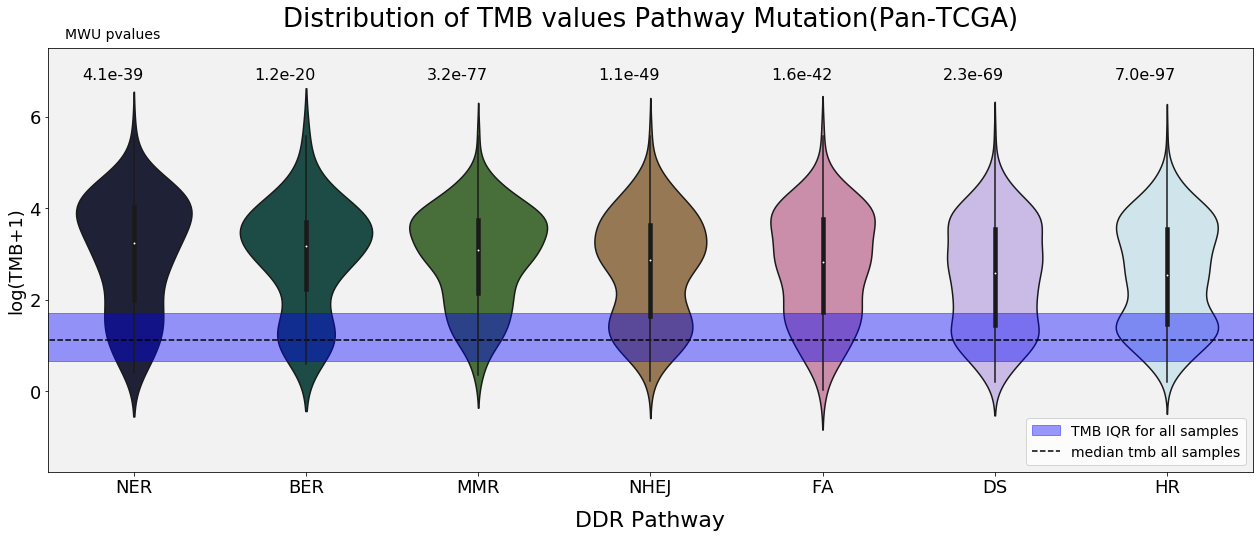

In [81]:
outfile=os.path.join(supplements_dir,'violin_fig_tcga.pdf')


path_tmb_vals=pd.DataFrame(columns=['sample','tmb','path'])
# all_ind=alteration_data['Specimen ID'].unique() 

all_ind=tcga_data.tcga_spec_by_all_genes_wmod.index
array2use=tcga_data.tcga_spec_by_all_genes
snv_df=tcga_data.tcga_snv_indel_df

pathways2use=['BER', 'NER', 'MMR', 'FA', 'HR', 'NHEJ', 'DS']

for path in pathways2use:
    genes=ddr_obj.path_2_genes_dict[path]
    ctmbs=bigbets.bipartite_helper_functions.get_tmb_values_genes(genes,array2use,snv_indel_df=snv_df)
    ctmbs=ctmbs.to_frame(name='tmb')
    ctmbs['sample']=ctmbs.index
    ctmbs['path']=path
    ctmbs.index=np.arange(ctmbs.shape[0])
    path_tmb_vals=pd.concat([path_tmb_vals,ctmbs])
    
path_tmb_vals['log1ptmb']=path_tmb_vals['tmb'].apply(np.log1p)


plt.close()
f,a=plt.subplots(1,1,figsize=(18,7.5))
var2use='log1ptmb'
order=path_tmb_vals.groupby('path')[var2use].median().sort_values(ascending=False).index
pal=sbn.color_palette('cubehelix',n_colors=len(order))

bp=sbn.violinplot(y=var2use,x='path',order=order,inner='box',
               data=path_tmb_vals,palette=pal,ax=a,scale='area')


n=len(all_ind)
low_n=int(np.round(n/2.0-1.96*np.sqrt(n)/2.0))
up_n=int(np.round(n/2.0+1.96*np.sqrt(n)/2.0))

all_tmb_log1p=np.log1p(snv_df.loc[all_ind,'tmb'])

up_qrt,low_qrt=np.percentile(all_tmb_log1p,[75,25])
median_snv=np.median(all_tmb_log1p)

xmin=-1
xmax=7.5
# a.fill_between(x=[xmin,xmax],y1=[CI_up,CI_up],y2=[CI_low,CI_low],alpha=.4,color='red')
a.fill_between(x=[xmin,xmax],y1=[up_qrt,up_qrt],y2=[low_qrt,low_qrt],alpha=.4,color='blue',label='TMB IQR for all samples')
a.hlines(y=median_snv,xmin=xmin,xmax=xmax,linestyle='--',label='median tmb all samples')
a.text(s="DDR Pathway",fontsize=22,x=.5,y=-.13,horizontalalignment='center',transform=a.transAxes)
a.set_xlabel("")
a.set_ylabel("log(TMB+1)",fontsize=18)
for i,path in enumerate(order):
    a.text(s="{:.1e}".format(ddr_path_bigbets.loc[path,'MWU_pval']),x=i-.3,y=6.8,rotation=0,fontsize=16)

    
plt.setp(a.get_xticklabels(), fontsize=18) 
a.set_facecolor((.95,.95,.95,1))
a.text(s='MWU pvalues',y=7.7,x=-.4,fontsize=14)
a.set_ylim([-1.75,7.5])
a.set_xlim([-.5,6.5])
# a.text(s='MWU pvalues',y=6,x=6.5)
a.legend(loc=4,fontsize=14)
a.set_title("Distribution of TMB values Pathway Mutation(Pan-TCGA)",fontsize=26,
            x=.5,y=1.05,transform=a.transAxes)
f.subplots_adjust(top=.915,bottom=.13,right=.98,left=.05)
f.savefig(outfile)
plt.show()


2021-12-03 10:27:21,973:matplotlib.axes._axes:WARNING:'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2021-12-03 10:27:21,978:matplotlib.axes._axes:WARNING:'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2021-12-03 10:27:21,983:matplotlib.axes._axes:WARNING:'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for a

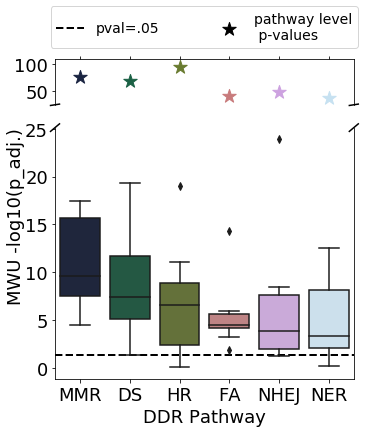

In [27]:

outfile=os.path.join(supplements_dir,"DDR_MWU_dist_comp.pdf")
plt.close()


ddr_filt_only=all_big_bets[np.logical_not(all_big_bets['path'].isin(['None',np.nan]))]
ddr_filt_only_nober=ddr_filt_only[ddr_filt_only['path']!='BER']

order=ddr_filt_only_nober.groupby('path')['-log10_padj'].median().sort_values(ascending=False).index

colors=sbn.color_palette('cubehelix',n_colors=len(order))

f=plt.gcf()
f.set_size_inches(5,6)
gs=gridspec.GridSpec(nrows=10,ncols=1)

a=plt.subplot(gs[2:,0])
sbn.boxplot(data=ddr_filt_only_nober,x='path',y='-log10_padj',order=order,ax=a,palette=colors)
a.set_ylabel('')
a.text(s="MWU -log10(p_adj.)",x=-.16,y=.65,transform=a.transAxes,
       fontsize=18,rotation=90,verticalalignment='center')
a.set_xlabel("DDR Pathway",fontsize=18)
a2=plt.subplot(gs[:2,0],sharex = a)
for i,path in enumerate(order):
    a2.scatter(i,ddr_path_bigbets.loc[path,'-1og10_MWU'],marker='*',s=200,c=colors[i])
a2.set_ylim([25,110])
# hide the spines between ax and a
a2.spines['bottom'].set_visible(False)
a.spines['top'].set_visible(False)
a2.xaxis.tick_top()
a2.tick_params(labeltop=False)  # don't put tick labels at the top
a.xaxis.tick_bottom()
a.hlines(y=-1*np.log10(.05),xmin=-.5,xmax=5.5,linestyle='--',label='pval=.05',linewidth=2)

a.scatter([],[],c='k',marker='*',label='pathway level\n p-values',s=200)
a.legend(loc=10,bbox_to_anchor=(.5,1.4),fontsize=14,ncol=2,mode=None,columnspacing=4)

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0,0), (0,1),
# (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=a2.transAxes, color='k', clip_on=False)

d2=d
a2.plot((-d2, +d2), (-d2, +d2), **kwargs)        # top-left diagonal
a2.plot((1 - d2, 1 + d2), (-d2, +d2), **kwargs)  # top-right diagonal

kwargs.update(transform=a.transAxes)  # switch to the bottom axes
a.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
a.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diago


f.subplots_adjust(hspace=2,top=.87,right=.97,left=.14,bottom=.13)
f.savefig(outfile)
plt.show()

## Histogram of DDR Genes

In [10]:
all_big_bets.head()

,path,zscore_tcga,size_tcga,mwu_tcga,pval_tcga,padj_tcga,is_ddr,mwu_sig,mwu_padj,-log10_padj,zscore_sig
A1BG,None,0.086336,8.0,2.662741e-04,0.465600,0.495447,non DDR,True,6.581060e-04,3.181704,False
A1CF,None,-1.662445,23.0,8.238750e-04,0.048212,0.404211,non DDR,True,1.725160e-03,2.763171,False
A2M,None,-0.148102,23.0,8.818462e-09,0.441131,0.492091,non DDR,True,8.223355e-08,7.084951,False
A2ML1,None,-1.179348,21.0,2.279124e-05,0.119130,0.429369,non DDR,True,7.913985e-05,4.101605,False
A3GALT2,None,1.312980,3.0,2.234168e-03,0.094595,0.423616,non DDR,True,4.071259e-03,2.390271,False


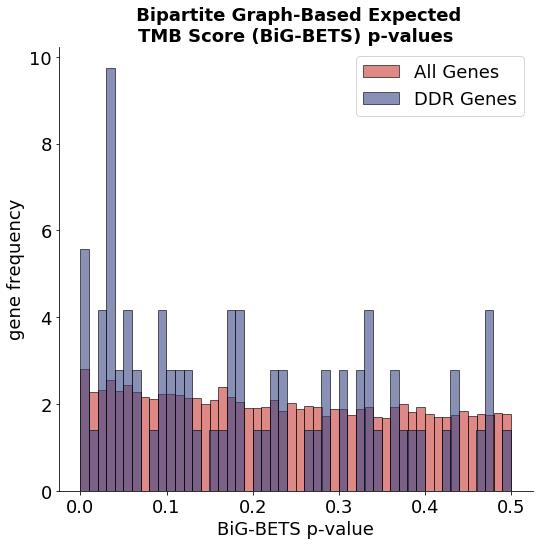

In [11]:
outfile=os.path.join(supplements_dir,'pval_dist_zscore_tcga.pdf')

paths=all_big_bets['path'].unique()
paths=paths[paths!='None']
cols=sbn.color_palette('Set1',n_colors=len(paths))
path2coldict=dict(zip(paths,cols))
path2coldict['None']=(.3,.3,.3,.5)

all_big_bets['ddr_col']=all_big_bets['path'].apply(lambda x :path2coldict.get(x,(.3,.3,.3,.5)) )
ddr_filt_only=all_big_bets.iloc[np.where(np.logical_not(all_big_bets['path'].isin(['None'])))[0],:]


plt.close()
f,a=plt.subplots(1,1,figsize=(7,7))

# 
# a.text(s='B)',fontsize=18,fontweight='bold',x=-.06,y=1.0,transform=a.transAxes)

a.hist(all_big_bets['pval_tcga'],bins=50,alpha=.6,color=red,edgecolor='k',density=True,label='All Genes')
a.hist(ddr_filt_only['pval_tcga'],bins=50,alpha=.6,color=blue,edgecolor='k',density=True,label='DDR Genes')
a.legend(fontsize=18)
a.set_ylabel("gene frequency",fontsize=18)
a.spines['top'].set_visible(False)
a.spines['right'].set_visible(False)

a.set_xlabel("BiG-BETS p-value",fontsize=18)
a.set_title(" Bipartite Graph-Based Expected\nTMB Score (BiG-BETS) p-values",fontsize=18,fontweight='bold')
# a.set_ylim([0,750])
f.subplots_adjust(top=.95,right=.99,left=.05,bottom=.07)
f.savefig(outfile)
plt.show()

## Individual Gene CDFs

In [46]:
genes2keep=['ATR',"CHEK1"]

smaller_runs_dir=os.path.join(sub_samples_dir,"smaller_runs")
data_files=[ os.path.join(smaller_runs_dir,f) for f in os.listdir(smaller_runs_dir) if re.search("genes.pickle",f)]

#we keep track of the mean tmb for each gene and each sample across all runs
combined_gene_cdfs_tmbs={}
data_files
genes2use=tcga_data.tcga_spec_by_all_genes.columns
for i,file in enumerate(data_files):
    print(i)
    with gzip.open(file,'rb') as fh:
        cdata=pickle.load(fh)
    for ii,gene in enumerate(genes2keep):
        all_x,all_ecdf=cdata.loc[gene]
        all_x=np.array(all_x)
        if i==0:
            combined_gene_cdfs_tmbs[gene]=(np.array(all_x),np.array(all_ecdf))
        else:
            cur_comb_all_x,cur_comb_ecdf=combined_gene_cdfs_tmbs[gene]
            combined_gene_cdfs_tmbs[gene]=(np.concatenate([cur_comb_all_x,all_x],axis=0),
                                      np.concatenate([cur_comb_ecdf,np.array(all_ecdf)]))
    
    del cdata
    print()

0

1

2

3

4

5



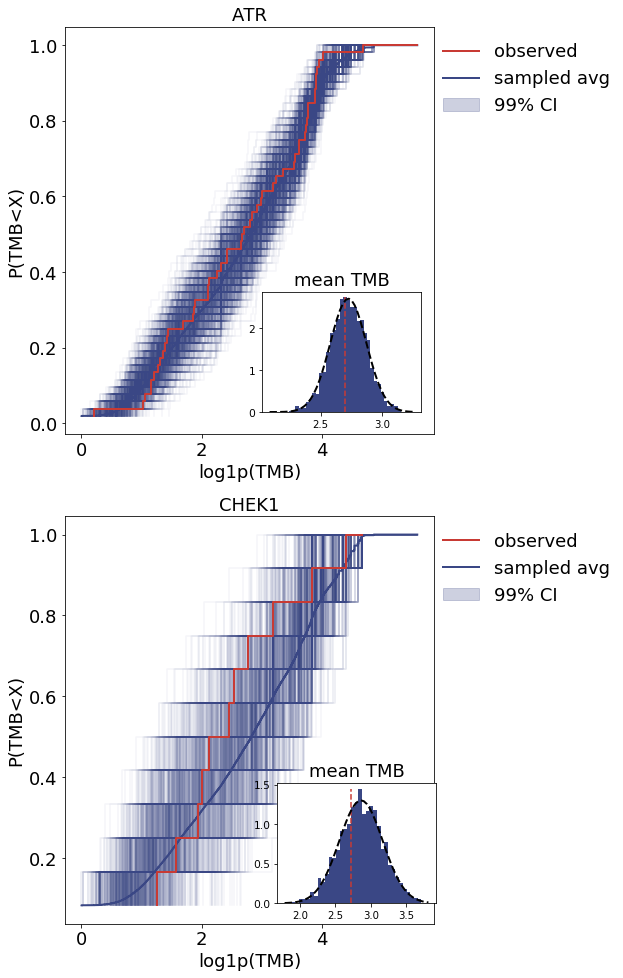

In [79]:

outfile=os.path.join(supplements_dir,"tcga_atr_check1_rewire.pdf")

array=tcga_data.tcga_spec_by_all_genes


f,a=plt.subplots(2,1,figsize=(9,14))

hscale=.7
yscale=.87

gene='ATR'
a=plt.subplot(2,1,1)
all_x,all_ecdf=combined_gene_cdfs_tmbs[gene]
x_cat, mean_ecdf, ecdf_lower, ecdf_upper = bigbets.bipartite_helper_functions.get_ecdf_upper_lower(all_x, all_ecdf)
x1,ecdf1=bigbets.bipartite_helper_functions.get_ecdf_tmb_df(genes=[gene],df=array,
                      snv_indel_df=tcga_data.tcga_snv_indel_df)

a.step(x1, ecdf1, color=red, label='observed', zorder=3, linewidth=2)
# a.hlines(y=.5, xmin=0, xmax=2, linestyle='--')
#     a.plot(x,ecdf,color='g',label='all')
a.step(x_cat, mean_ecdf, color=blue, label='sampled avg', linewidth=2)
# a.set_title("{:}({:d} genes / {:d} samples)".format(path, len(path_ind), nsamps), fontsize=18,
#             fontweight='bold')
a2=bigbets.bipartite_helper_functions.add_subplot_axes(ax=a,rect=[.4,.09,.45*hscale,.4*yscale])
a2.set_title("mean TMB",fontsize=18)
med_tmbs=[]
for i, x_s in enumerate(all_x):
    a.step(x_s, all_ecdf[i], color=blue, alpha=.05)
    med_tmbs.append(np.mean(x_s))
    
    
# a.fill_between(x_cat, ecdf_lower,ecdf_upper,color='b',alpha=.05,label='99% CI')

y, x, _ =a2.hist(med_tmbs,bins=35,density=True,color=blue)
a2.vlines(x=np.mean(x1),ymin=0,ymax=y.max(),color=red,linestyle='--')
xs=np.linspace(x.min()-.1,x.max()+.1)
p = stats.norm.pdf(xs, np.mean(med_tmbs), np.std(med_tmbs))
a2.plot(xs,p,color='k',linestyle='--',linewidth=2)

a.set_title("{}".format(gene), fontsize=18)
a.set_xlabel("log1p(TMB)", fontsize=18)
a.set_ylabel('P(TMB<X)',fontsize=18)
#     a.set_xlim([0,.1])

# add in CI label to legend
handles, labels = a.get_legend_handles_labels()
patch = patches.Patch(color=blue, label='99% CI',alpha=.25)
handles.append(patch) 
a.legend(handles=handles, loc='upper center',fontsize=18,bbox_to_anchor=[1.25,1.0],frameon=False)

gene='CHEK1'
a=plt.subplot(2,1,2)
all_x,all_ecdf=combined_gene_cdfs_tmbs[gene]
x_cat, mean_ecdf, ecdf_lower, ecdf_upper = bigbets.bipartite_helper_functions.get_ecdf_upper_lower(all_x, all_ecdf)
x1,ecdf1=bigbets.bipartite_helper_functions.get_ecdf_tmb_df(genes=[gene],df=array,
                      snv_indel_df=tcga_data.tcga_snv_indel_df)

a.step(x1, ecdf1, color=red, label='observed', zorder=3, linewidth=2)
# a.hlines(y=.5, xmin=0, xmax=2, linestyle='--')
#     a.plot(x,ecdf,color='g',label='all')
a.step(x_cat, mean_ecdf, color=blue, label='sampled avg', linewidth=2)
# a.set_title("{:}({:d} genes / {:d} samples)".format(path, len(path_ind), nsamps), fontsize=18,
#             fontweight='bold')
a2=bigbets.bipartite_helper_functions.add_subplot_axes(ax=a,rect=[.43,-.13,.45*hscale,.4*yscale])
a2.set_title("mean TMB",fontsize=18)
med_tmbs=[]
for i, x_s in enumerate(all_x):
    a.step(x_s, all_ecdf[i], color=blue, alpha=.05)
    med_tmbs.append(np.mean(x_s))
    
    
# a.fill_between(x_cat, ecdf_lower,ecdf_upper,color='b',alpha=.05,label='99% CI')

y, x, _ =a2.hist(med_tmbs,bins=35,density=True,color=blue)
a2.vlines(x=np.mean(x1),ymin=0,ymax=y.max(),color=red,linestyle='--')
xs=np.linspace(x.min()-.1,x.max()+.1)
p = stats.norm.pdf(xs, np.mean(med_tmbs), np.std(med_tmbs))
a2.plot(xs,p,color='k',linestyle='--',linewidth=2)

a.set_title("{}".format(gene), fontsize=18)
a.set_xlabel("log1p(TMB)", fontsize=18)
a.set_ylabel('P(TMB<X)',fontsize=18)
#     a.set_xlim([0,.1])

# add in CI label to legend
handles, labels = a.get_legend_handles_labels()
patch = patches.Patch(color=blue, label='99% CI',alpha=.25)
handles.append(patch) 
a.legend(handles=handles, loc='upper center',fontsize=18,bbox_to_anchor=[1.25,1.0],frameon=False)


f.subplots_adjust(top=.95,right=.7,left=.13,bottom=.06)
f.savefig(outfile,dpi=200)
plt.show()

## TCGA vs Samstein BiG-BET scores

querying 1-461...done.
Finished.
21 input query terms found no hit:
	['FAM46C', 'TCEB1', 'HIST1H3B', 'HIST1H3I', 'HIST1H3G', 'WHSC1L1', 'HIST1H3H', 'HIST1H3C', 'HIST1H3J
querying 1-21...done.
Finished.
2 input query terms found dup hits:
	[('WHSC1L1', 2), ('HIST1H2BD', 2)]


2021-12-03 13:10:26,295:matplotlib.axes._axes:WARNING:'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2021-12-03 13:10:26,301:matplotlib.axes._axes:WARNING:'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2021-12-03 13:10:26,306:matplotlib.axes._axes:WARNING:'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for a

2021-12-03 13:10:26,440:matplotlib.axes._axes:WARNING:'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2021-12-03 13:10:26,446:matplotlib.axes._axes:WARNING:'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2021-12-03 13:10:26,452:matplotlib.axes._axes:WARNING:'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for a

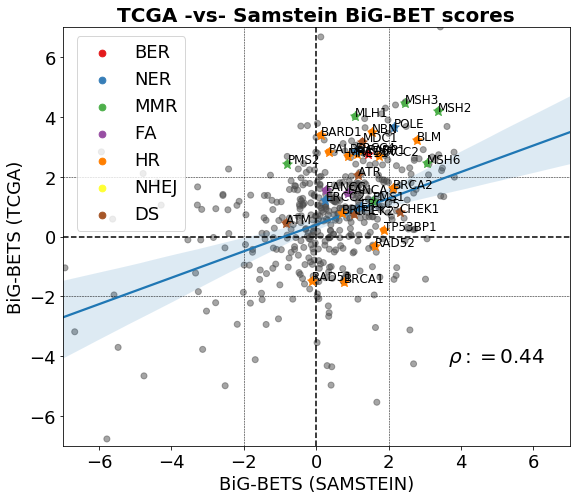

In [121]:
samstein_bigbet_scores=pd.read_csv(os.path.join(samples_dir,'samstein_rewiring_zscores.csv'),index_col=0)

#match names if needed
orig_names=samstein_bigbet_scores.index
new_names=bigbets.name_matching_scripts.match_names_to_symbols(samstein_bigbet_scores.index)
samstein_bigbet_scores.index=new_names
samstein_bigbet_scores.index.isin(all_big_bets.index)

samstein_bigbet_scores['zscore_tcga_samstein_filt']=samstein_bigbet_scores['zscore_tcga']
samstein_bigbet_scores['zscore_tcga']=all_big_bets.loc[samstein_bigbet_scores.index.intersection(all_big_bets.index),'zscore_tcga']
samstein_bigbet_scores['path']=list(map(lambda x: ddr_obj.gene_2_path_dict.get(x,['None'])[0],samstein_bigbet_scores.index))


# outfile=os.path.join(graphics_dir,"samstein_vs_tcga_allgenelevel_permutation_test.png")
outfile=os.path.join(supplements_dir,'samstein_vs_tcga_allgenelevel_permutation_test.pdf')
paths=['BER', 'NER', 'MMR', 'FA', 'HR', 'NHEJ', 'DS']

cols=sbn.color_palette('Set1',n_colors=len(paths))
path2coldict=dict(zip(paths,cols))
path2coldict['None']=(.3,.3,.3,.5)
samstein_bigbet_scores['ddr_col']=samstein_bigbet_scores['path'].apply(lambda x :path2coldict.get(x,(.3,.3,.3,.5)) )



plt.close()
f,a=plt.subplots(1,1,figsize=(8,7))



a=plt.subplot(1,1,1) 
x=samstein_bigbet_scores['zscore_samstein'].values
y=samstein_bigbet_scores['zscore_tcga_samstein_filt'].values
slope,inter,_,_,_=stats.linregress(x,y)
r2,pval=stats.pearsonr(x,y)

sizes=samstein_bigbet_scores['size_samstein']/2
a.scatter(x,y,c=samstein_bigbet_scores['ddr_col'].values)
sbn.regplot(x='zscore_samstein',y='zscore_tcga_samstein_filt',data=samstein_bigbet_scores,ax=a,scatter=False)


#add annotations 
# ts=[]
# for gene in samstein_bigbet_scores.index:
#     x=samstein_bigbet_scores.loc[gene,'zscore_samstein']
#     y=samstein_bigbet_scores.loc[gene,'zscore_tcga_samstein_filt']
#     if  x>0 or y>0:
#         sign= -1 if y>x*slope+inter else 1
        
#         dist=np.random.uniform(low=10,high=40)
        
#         ts.append(a.annotate(gene, xy=(x, y), xytext=(sign*dist,-sign*dist), 
#                 textcoords='offset points', ha='center', va='bottom',fontsize=18,
#                 bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.3),
#                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.0', 
#                                 color='red')))
        
# adjust_text(ts)

for gene in samstein_bigbet_scores.index:
    if gene in ddr_filt_only.index:
        x=samstein_bigbet_scores.loc[gene,'zscore_samstein']
        y=samstein_bigbet_scores.loc[gene,'zscore_tcga_samstein_filt']
        a.scatter(x,y,c=samstein_bigbet_scores.loc[gene,'ddr_col'],s=100,marker="*",zorder=3)
        a.text(s=gene,x=x,y=y,fontsize=12)

leg1=[]
for path in paths:
    if path in ddr_path_bigbets.index:
#         a.scatter(ddr_path_zscore.loc[path,'zscore_samstein'],ddr_path_zscore.loc[path,'zscore_tcga_samstein_filt'],
#                   marker='o',facecolor='none',edgecolor=path2coldict[path],linewidth=3,s=1000)
        leg1+=[a.scatter([],[],s=45,color=path2coldict[path])]
Leg1=Legend(a, leg1, paths, bbox_to_anchor=(.01, 1),loc=2,fontsize=18)

a.text(x=.76,y=.2,s=r"$\rho:={:.2f}$".format(r2),
       transform=a.transAxes,fontsize=20,fontweight="bold")

a.set_title("TCGA -vs- Samstein BiG-BET scores",fontsize=20,fontweight='bold')
a.set_xlabel("BiG-BETS (SAMSTEIN)",fontsize=18)
a.set_ylabel("BiG-BETS (TCGA)",fontsize=18)

a.add_artist(Leg1)

a.set_ylim([-7,7])
ymin,ymax=a.get_ylim()
a.vlines(x=0,ymin=ymin,ymax=ymax,linestyle='--')
a.vlines(x=2,ymin=ymin,ymax=ymax,linestyle='--',linewidth=.5)
a.vlines(x=-2,ymin=ymin,ymax=ymax,linestyle='--',linewidth=.5)

a.set_xlim([-7,7])
xmin,xmax=a.get_xlim()
a.hlines(y=0,xmin=xmin,xmax=xmax,linestyle='--')
a.hlines(y=-2,xmin=xmin,xmax=xmax,linestyle='--',linewidth=.5)
a.hlines(y=2,xmin=xmin,xmax=xmax,linestyle='--',linewidth=.5)



f.subplots_adjust(top=.93,bottom=.1,right=.98,left=.1)
f.savefig(outfile,dpi=200)
plt.show()

## Percentage Genes High BigBETS by pathway

/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


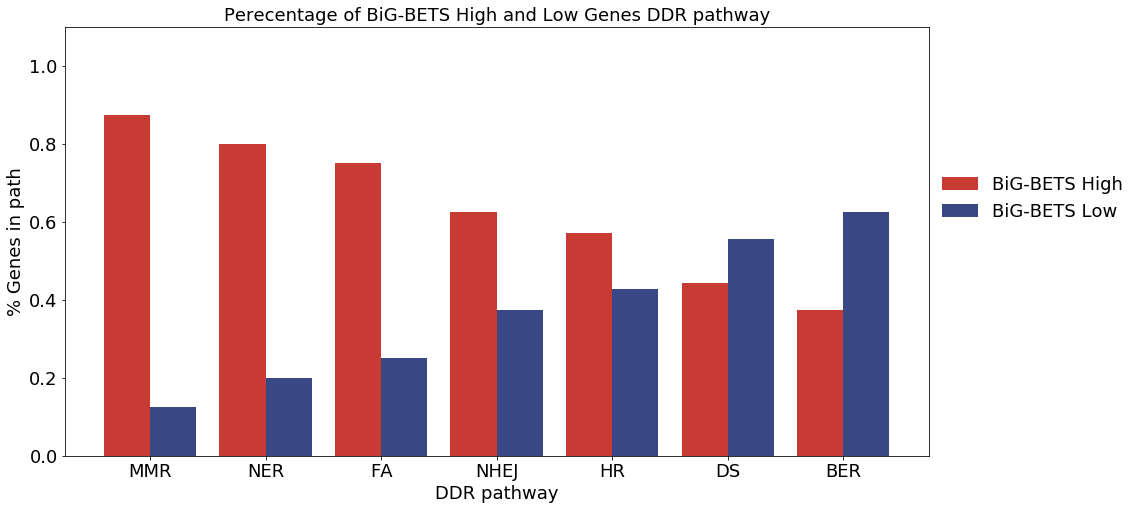

In [99]:
outfile=os.path.join(supplements_dir,'percent_high_low_zscore_by_DDRpathway.pdf')
ddr_filt_only=all_big_bets.iloc[np.where(np.logical_not(all_big_bets['path'].isin(['None'])))[0],:]

ddr_filt_only['z_score_class']=ddr_filt_only['zscore_tcga'].apply(lambda x: 'high' if x > 0 else 'low')
pathway_zscoreclass=ddr_filt_only.groupby(['path','z_score_class']).size().unstack()
pathway_zscoreclass['size']=np.sum(pathway_zscoreclass,axis=1)
pathway_zscoreclass['per_high']=pathway_zscoreclass['high']/pathway_zscoreclass['size']
pathway_zscoreclass['per_low']=pathway_zscoreclass['low']/pathway_zscoreclass['size']
pathway_zscoreclass.sort_values(by='per_high',ascending=False,inplace=True)

plt.close()
f,a=plt.subplots(1,1,figsize=(16,7))

a=plt.subplot(1,1,1)
a.bar(x=np.arange(pathway_zscoreclass.shape[0])-.2,width=.4,
      height=pathway_zscoreclass['per_high'],color=red,label='BiG-BETS High')
a.set_ylabel("% Genes in path",fontsize=18)
a.set_xlabel("DDR pathway",fontsize=18)

a.bar(x=np.arange(pathway_zscoreclass.shape[0])+.2, width=.4,
      height=pathway_zscoreclass['per_low'],color=blue,label='BiG-BETS Low')

a.set_xticks(range(pathway_zscoreclass.shape[0]))
a.set_xticklabels(pathway_zscoreclass.index)
a.legend(fontsize=18,frameon=False,bbox_to_anchor=[1.12,.6],loc=10)
a.set_ylim([0,1.1])
a.set_title("Perecentage of BiG-BETS High and Low Genes DDR pathway",fontsize=18)

f.subplots_adjust(top=.945,bottom=.094,right=.81,left=.06)
f.savefig(outfile,dpi=200)
plt.show()